 # 1. Cargue la señal de audio adjunta en la carpeta. Grafique la señal normalizada y en el dominio del tiempo.

In [1]:
#Se importan las libreria que se utilizaran duarante toda la guía.
from scipy.io.wavfile import read 
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import pywt
import librosa
from scipy.signal import kaiserord, lfilter, firwin, freqz
import soundfile as sf


%matplotlib inline

In [2]:
signal = 'tambores.wav'
audio=(signal) 

fs, x = read(audio)
x=x/float(max(abs(x)))
t=np.arange(0, float(len(x))/fs, 1.0/fs)

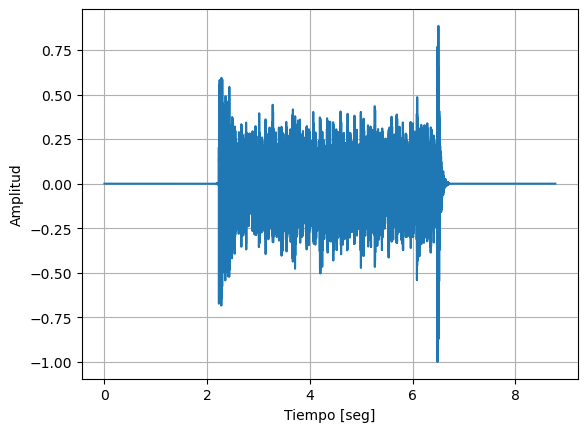

In [3]:
# Se procede a graficar la señal leida anteriormente
plt.plot(t,x) 
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud') 
plt.grid()
plt.show()

### 1.1 Identifique la frecuencia a la que se muestrea la señal

In [4]:
print(f'Esta es la frecuencia de muestreo de la señal: {fs}')

Esta es la frecuencia de muestreo de la señal: 8000


### 1.2 Escuche e identifique a que instrumento pertenece la señal presentada.

In [5]:
Audio(x, rate = fs) 

La señal de audio presentada anteriormente es de un instrumento de percusión, posiblemente un redoblante o tambor

# 2. Análisis en el dominio de la frecuencia

## 2.1 Para la señal tratada en el númeral anterior, encuentre los coeficientes de la TDW.

In [6]:
audio, fs = librosa.load(signal) 

wavelet = 'db4' 

# Realizar la TDW de la señal de audio
coeffs = pywt.wavedec(audio, wavelet) 


## 2.1 Grafique los coeficientes de la TDW, encontrados anteriormente.

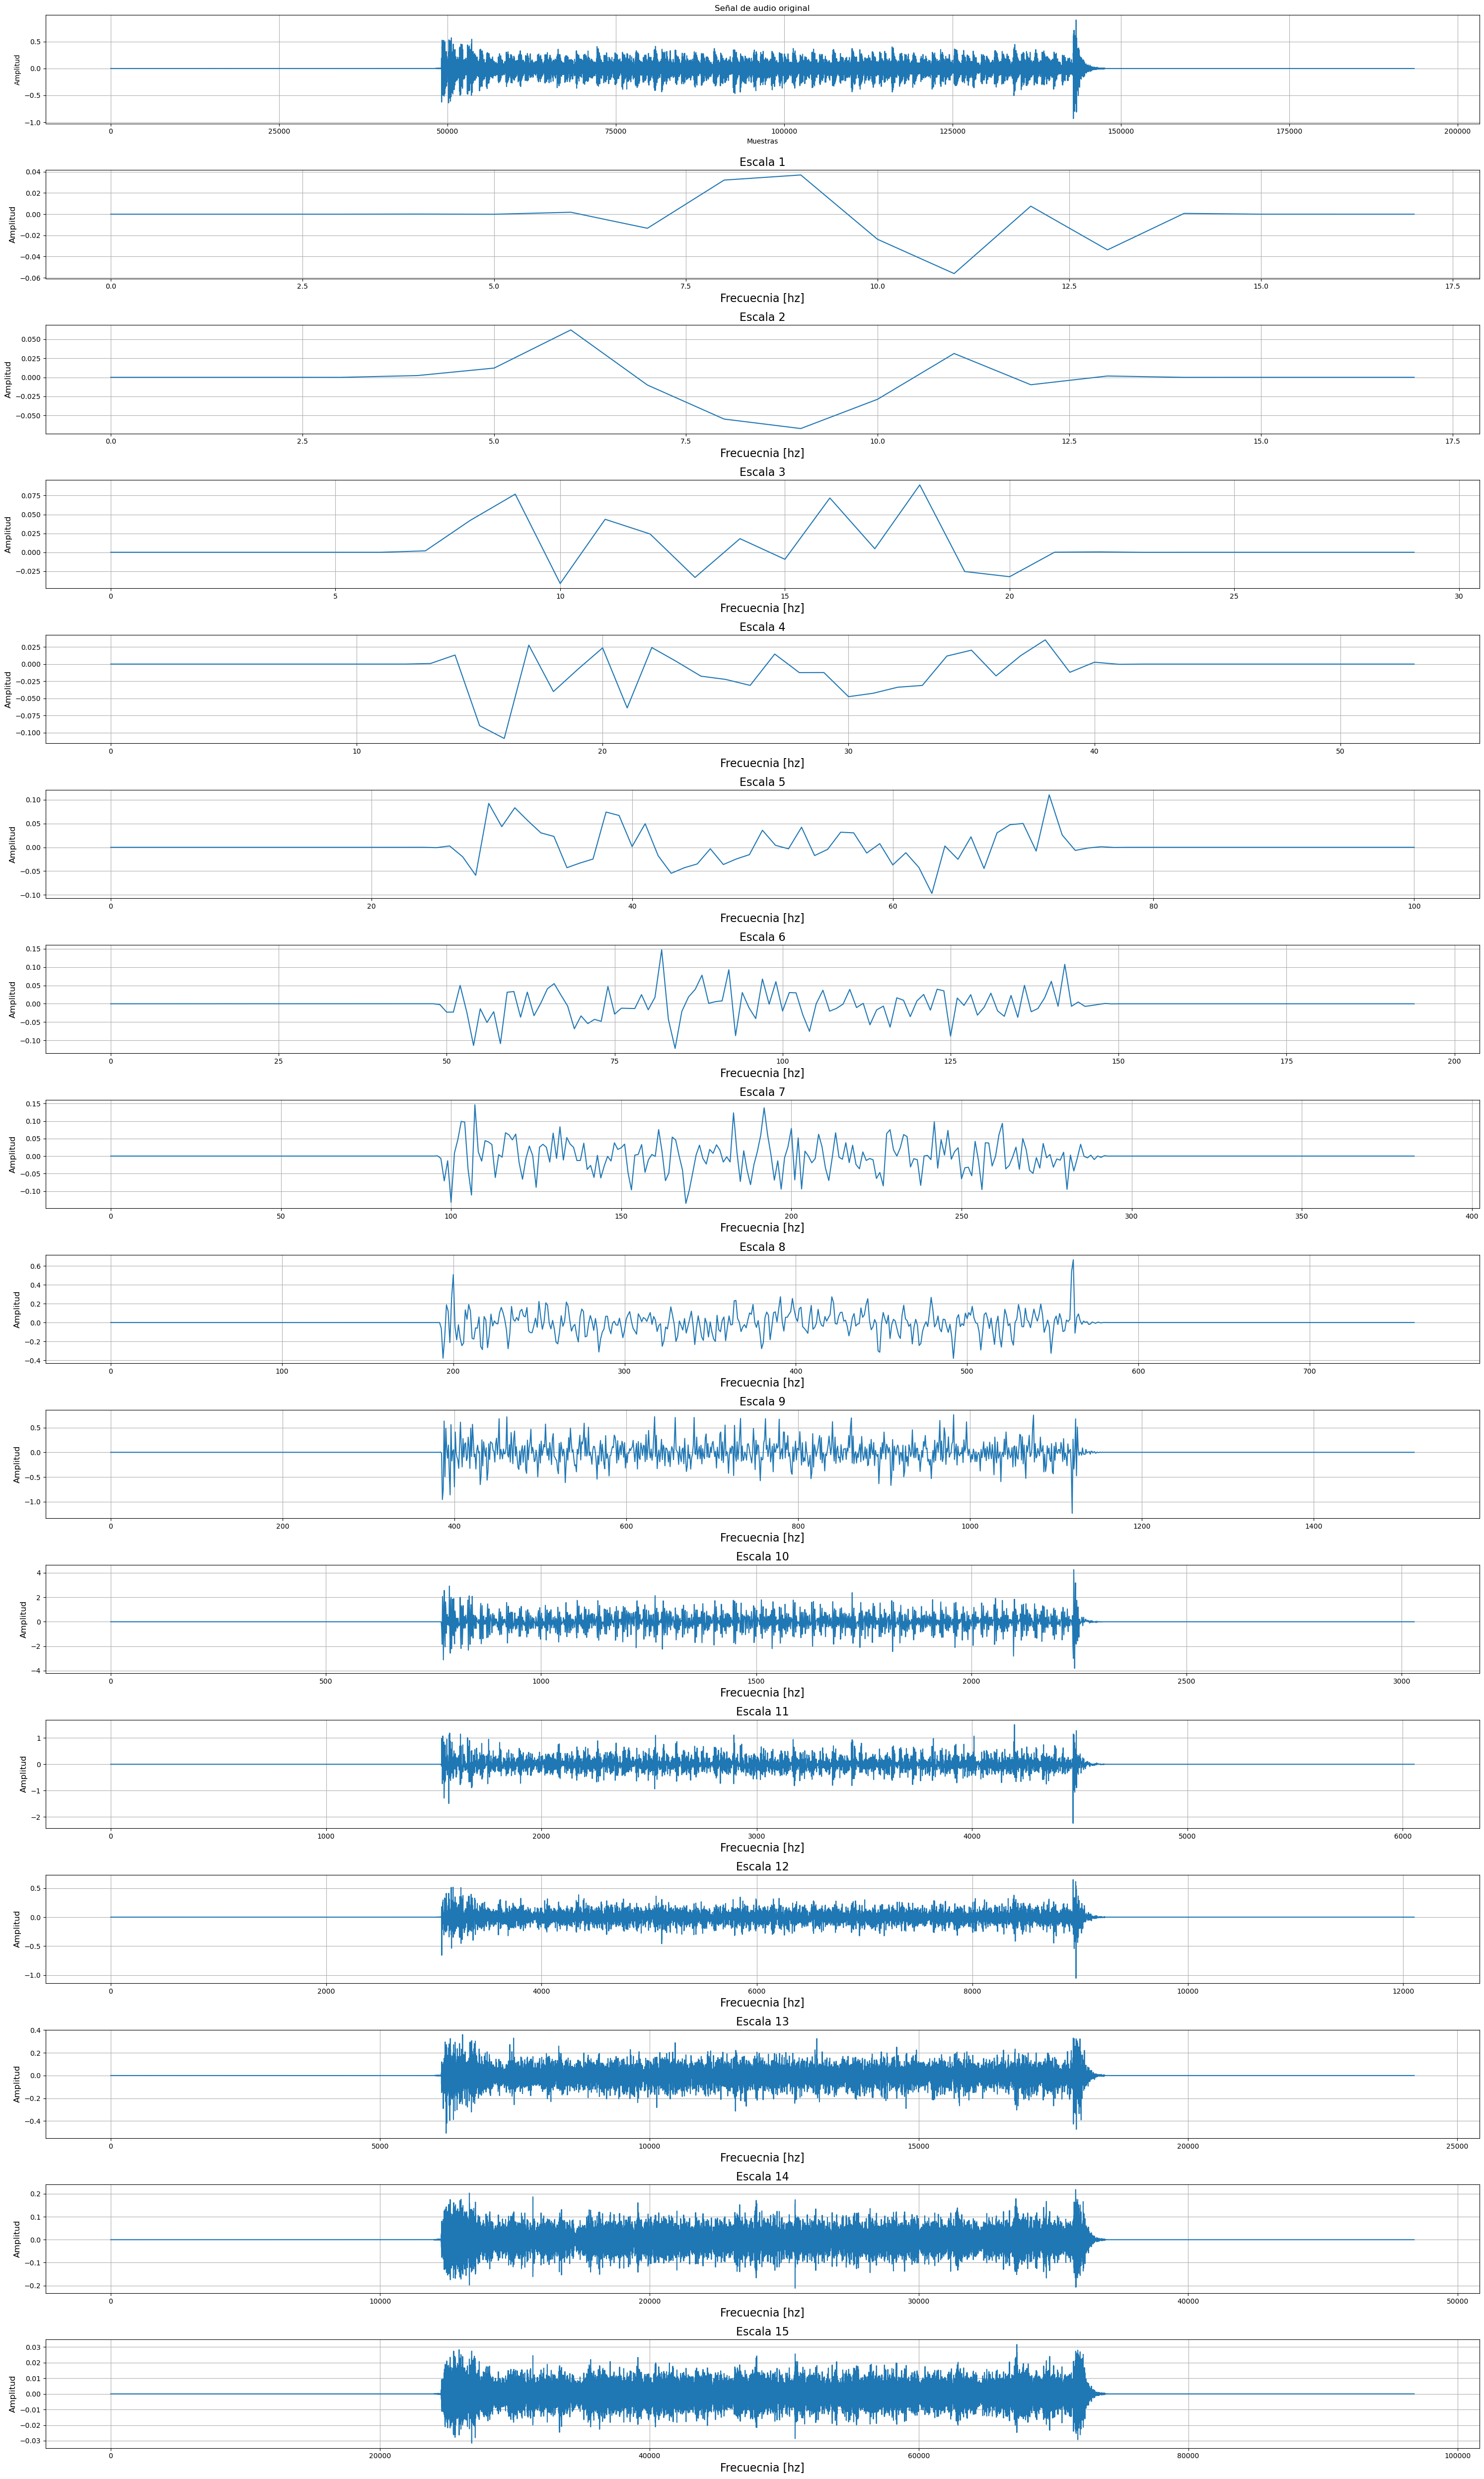

In [7]:
# Supongamos que tienes una lista de coeficientes llamada "coeffs"
# y una señal de audio original llamada "audio"
# y una frecuencia de muestreo "fs"

plt.figure(figsize=(30, 50))
plt.subplot(len(coeffs) + 1, 1, 1)
plt.plot(np.arange(len(audio)), audio)
plt.title('Señal de audio original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()

for i in range(len(coeffs)):
    plt.subplot(len(coeffs) + 1, 1, i + 2)
    plt.plot(np.arange(len(coeffs[i])), coeffs[i])
    plt.title('Escala {}'.format(i + 1), size=16)
    plt.xlabel('Frecuecnia [hz]', fontsize=16)
    plt.ylabel('Amplitud', fontsize=12)
    plt.grid()
    # Si deseas reproducir los coeficientes de la TDW en cada escala, puedes usar:
    # Audio(coeffs[i], rate=fs)

plt.tight_layout()
plt.show()

### 2.3 Que puede observar conforme se presenta una escala superior? Como se comporta la señal de interes?


El objetivo de la TDW es descomponer la señal en multiples escalas o vistas. En el eje de las amplitudes (eje y) es posible observar la amplitud y sus dimensiones, para ciertos rangos de frecuencia.

### 2.4 ¿En que rangos de frecuencia se logra tener mayor amplitud y menor amplitud?

Al observar la escala 14, es posible identificar una amplitud mayor con respecto a las demás escalas presentadas, la frecuecnias oscilan entre 500hz y 1500hz. Ahora, se logra una menor amplitud en rangos de frecuecnia mayores, en la escala 18 se puede observar como de 2000 hz a 2500hz la amplitud es bastante baja.

### 2.5 ¿Que ventajas encuentra en la TDW con respecto a la transformada de Fourier a la hora de analizar el espectro de la señal? Realice la trasnformada discreta de Fourier del audio anterior, grafique sus componentes espectrales para un mejor análisis y concluya

In [8]:
def calcular_dft_audio(file_path):
    
    # Se importa el audio.
    audio, sr = librosa.load(file_path, sr=None)
    
    # Calcular la DFT del audio
    dft = np.fft.fft(audio)
    
    # Calculo de los coeficientes de la DFT
    frecuencias = np.fft.fftfreq(len(audio), 1/sr)
    
    # Se normalizan los ejes
    magnitud_dft = np.abs(dft)
    magnitud_dft_normalizada = magnitud_dft / np.max(magnitud_dft)
    
    
    # Graficar la DFT normalizada
    plt.plot(frecuencias, magnitud_dft_normalizada)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Transformada Discreta de Fourier (DFT) ')
    plt.grid(True)
    plt.show()

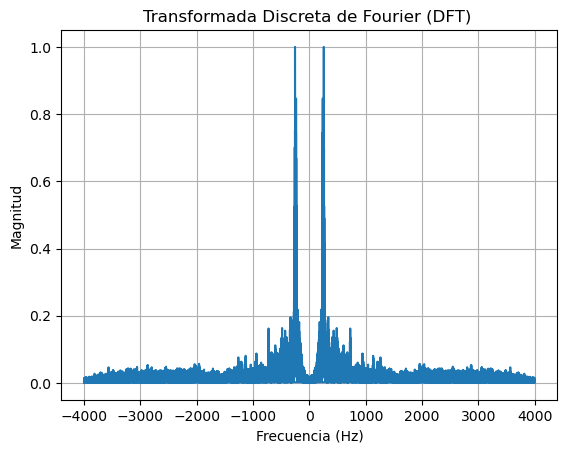

In [9]:
dft_siganl = calcular_dft_audio('tambores.wav')

Si bien ambas herramientas son de gran ayuda a la hora de analizar una señal en el dominio de la frecuencia, se encuentran ciertas particularidades, a partir del análisis de la gráficas anteriores, como los siguientes:

- Mayor nivel de detalle en el análisis de las componentes espectrales con la TDW. A escalas inferiores de la TDW es posible observar un nivel de detalle muy fino, en cuanto al comportamiento de la frecuencia se refiere.

- La DFT proporciona una representación más global y uniforme en el dominio de la frecuencia. Solo es posible observar una escala, para la visualización del rango de frecuencias.

- La TDW puede identificar y localizar eventos en una señal de audio con mayor precisión en comparación con la DFT. Esto es bastante útil a la hora de suprimir o identificar ruido en la señal.

- La información que presentan ambas transformadas se complementa, en ambas predominan las bajas frecuencias.



### 2.6 Basado en su experiencia, ¿son coherentes los resultados obtenidos anteriormente?

El audio presenta el sonido de un tambor o redoblante, en otras palabras, un instrumento de percusión. Estos instrumentos se caracterizan por llegar a tener frecuecnias bajas, en la mayoria de los casos, que puede ir desde los 30hz hasta los 2000hz, por tanto, los anteriores espectros no estan alejados de la realidad.

# 3. Energia de la señal utilizando la TDW

## 3.1 Utilizando la siguiente función, cálcule la energia de la señal previamente analizado con la TDW

In [10]:
def tdw_energy(coeffs):
    tdw_energy = 0
    for i in range(len(coeffs)):
        tdw_energy += np.sum(np.square(coeffs[i]))
        
    return tdw_energy

In [11]:
energy_signal_tdw = tdw_energy(coeffs);

In [12]:
print(f' La energia de la señal analizada con la TDW es de: {energy_signal_tdw}')

 La energia de la señal analizada con la TDW es de: 1384.346663649194


## 3.2 Utilizando la transformada de Fourier encuentre la energia de la señal anteriormente analizada con la TDW.

In [13]:
def fourier_energy(audio):
    dft = np.fft.fft(audio)
    energy = np.sum(np.square(np.abs(dft))) / len(dft)
    return energy

In [14]:
e_fourier = fourier_energy(audio)

In [15]:
print(f' La energia de la señal analizada con la Transformada de Fourier es de: {e_fourier}')

 La energia de la señal analizada con la Transformada de Fourier es de: 1384.3468704139943


## 3.3 Utilizando el teorema de Parseval, para la energia de una señal, en el domio del tiempo, realice el cálculo de la energia.

In [16]:
def energy(signal):
   
    return np.sum(signal**2)

In [17]:
energy_total = energy(audio)

In [18]:
print(f' La energia de la señal utilizando un método alterno a los anteriores es de: {energy_total}')

 La energia de la señal utilizando un método alterno a los anteriores es de: 1384.3470458984375


## 3.4 ¿La energia de la señal cambio entre ambos métodos? Si es asi, ¿por qué se da este hecho?

Hay una variación muy pequeña en el valor de la energia que se cálculo con la TDW, la trasnformada de Fourier y por el teorema de Parseval. Dicha variación, que aunque pequeña es, se puede atribuir a la manera en la que se cálcula la energia de la señal. 

Por el método de Fourier, por ejemplo calcula el valor absoluto de los coeficientes de la Transformada de Fourier, los eleva al cuadrado, y finalmente calcula la suma de los cuadrados de los valores absolutos y la divide por la longitud de la señal.

Por el método de la TDW, se divide la señal en diferentes escalas y frecuencias, es decir, en cada escala se toma el valor de la energia y dicho valor se lleva a una sumatoria, que será el valor de la energia total.

Por el teorema de Parseval, se eleva al cuadrado cada muestra de la señal y luego se suman los cuadrados de cada componente para obtener la energía total de la señal.

Sin embargo el valor de la energia entre un método y otro no varia mucho en su parte entera.

# 4. Uso de la transformada inversar de Wavelet

## 4.1 Utilizando el valor de los coeficientes encontrados anteriormente con la TDW, reconstruya la señal original en el dominio del tiempo.

In [19]:
mode = 'symmetric'

# Reconstruir la señal a partir de los coeficientes de TDW
reconstructed_signal = pywt.waverec(coeffs, wavelet, mode=mode)


In [20]:
Audio(reconstructed_signal, rate = fs) 

## 4.2 Que puede concluir acerca de la reconstrucción de la señal, precibe algunas difrencias  con respecto a la señal original?

Aparentemente no se dieron cambios siginificativos en la resconstrucción de la señal, a partir de los coeficientes de la TDW. Sin embargo es posible que se hayan dado cambios y sean percibidos solo por personas con gran sensibilidad en el oído.

Esto se debe a una propiedad de descomposición presente en la transformada.  Durante la descomposición, se obtienen coeficientes que representan la contribución de cada escala y frecuencia en la señal original. Sin embargo, a medida que se descompone la señal en escalas más altas, se va perdiendo información detallada y de alta frecuencia.

# 5. Filtros y la TDW

## 5.1 Tome la señal de audio, agregele ruido gaussiano y calcule los coeficientes de la TDW. Varie el nivel de ruido a su gusto

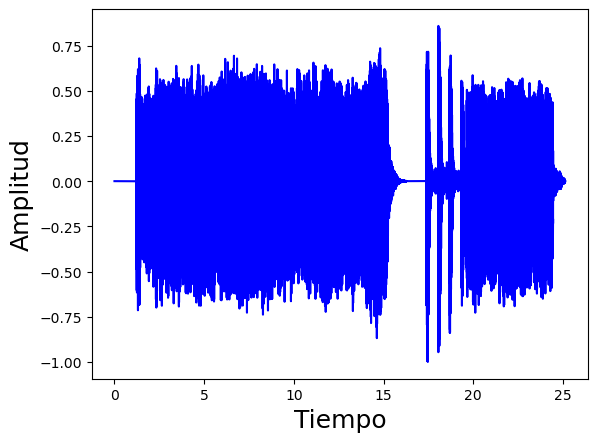

In [23]:
file_audio=('Guitarra.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
x=x/float(max(abs(x))) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) 
plt.plot(t,x, color='blue') 
plt.xlabel('Tiempo',fontsize=18) 
plt.ylabel('Amplitud',fontsize=18) 

plt.show() # Mostrar la grafica
Audio(x, rate=fs) # para escuchar la senal, si se desea

In [25]:
signal = "Guitarra.wav"
audio, fs = librosa.load("Guitarra.wav")

wavelet = 'db4'

# Realizar la TDW de la señal de audio
coeffs = pywt.wavedec(audio, wavelet) 

C:\Users\cmesa\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  warnings.warn(


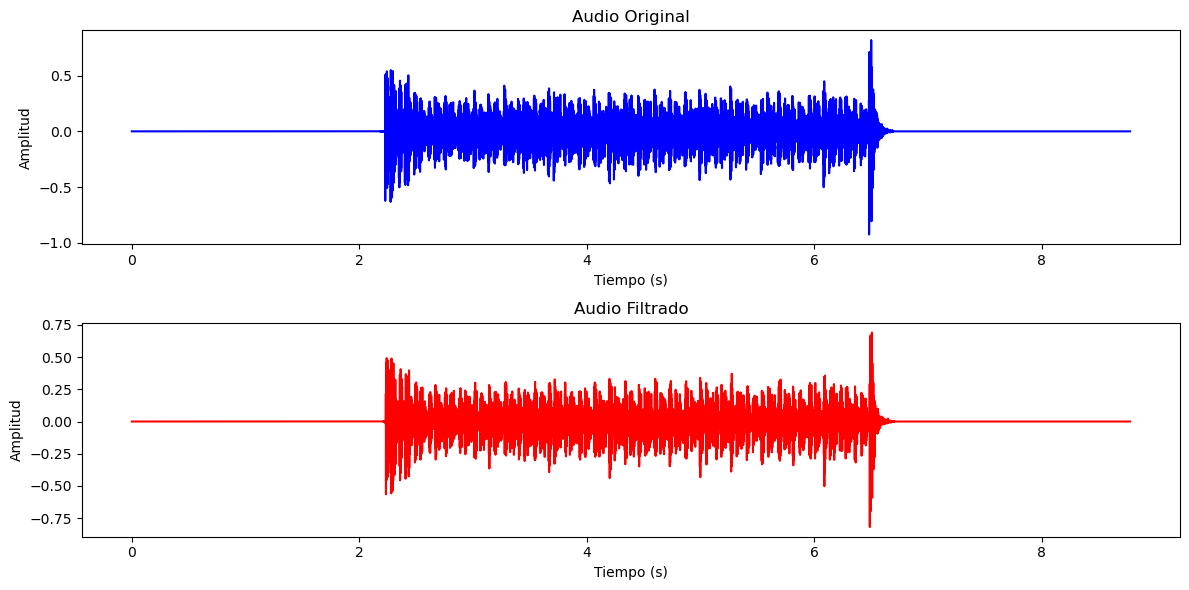

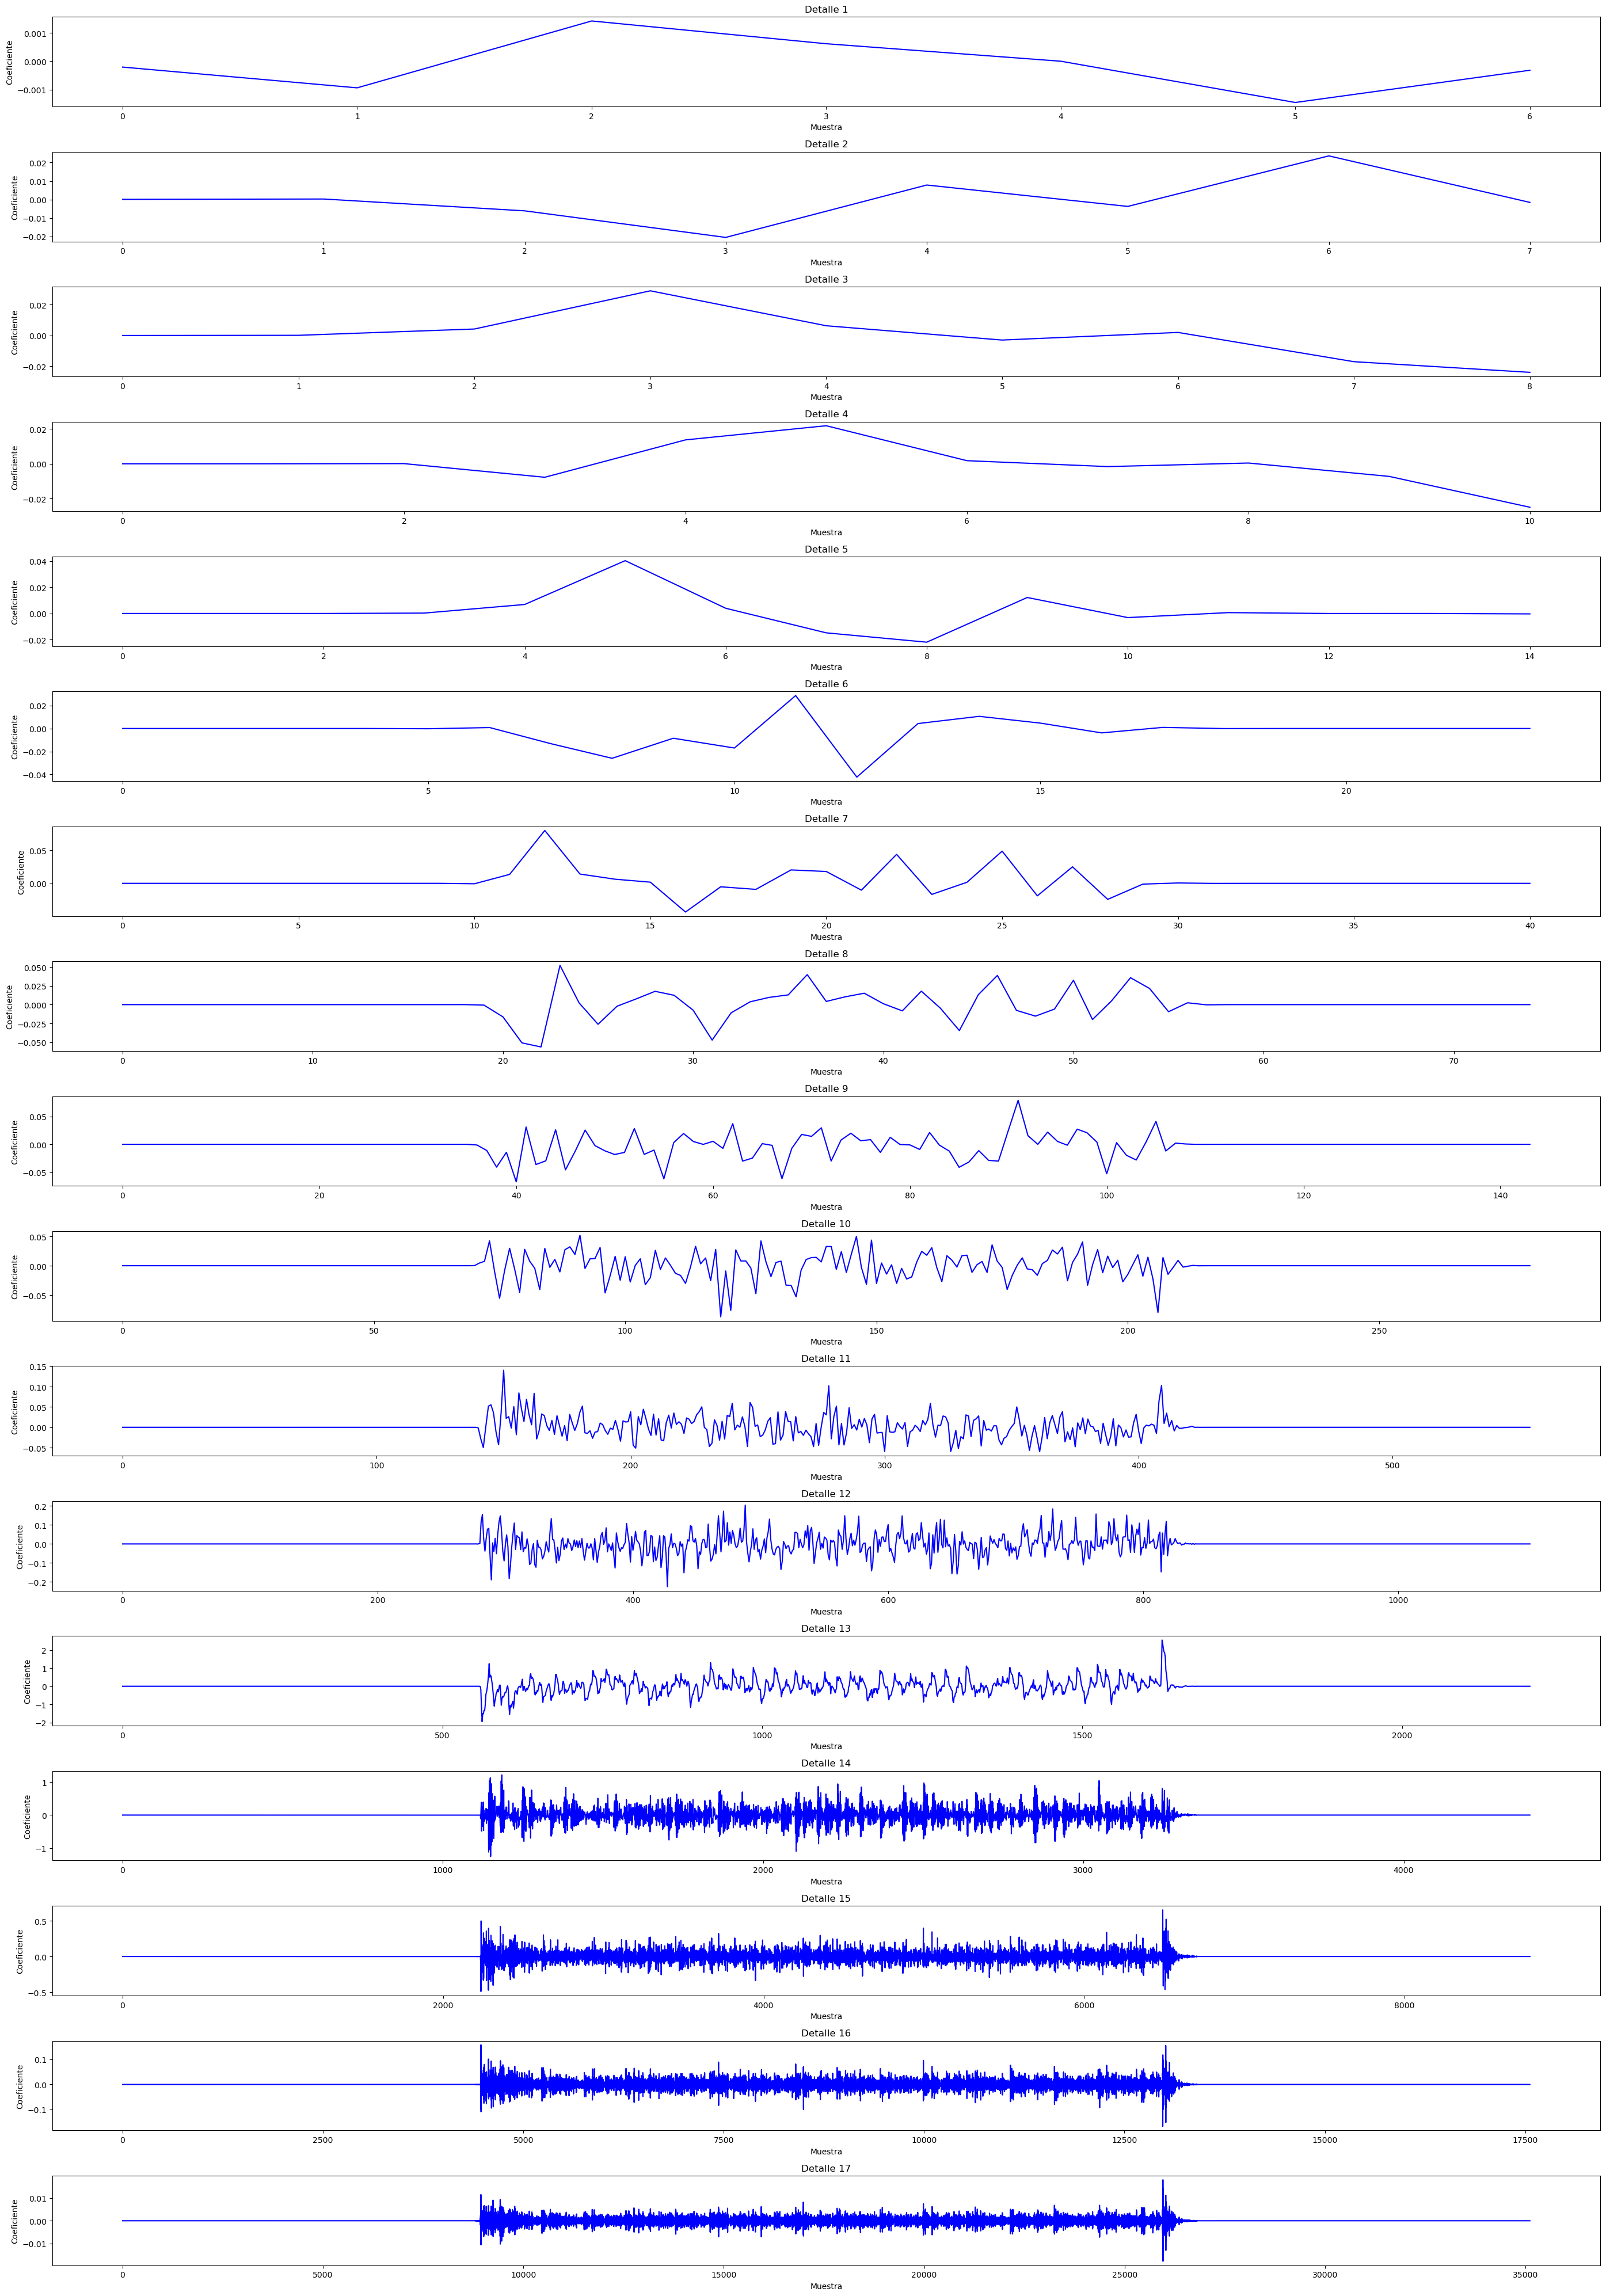

In [26]:
import pywt
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Cargar el archivo de audio
audio, sample_rate = sf.read("tambores.wav")

# Diseñar el filtro FIR
order = 100  # Orden del filtro
cutoff_freq = 1000  # Frecuencia de corte en Hz
filter_coeffs = signal.firwin(order+1, cutoff_freq, fs=sample_rate)

# Filtrar el audio utilizando el filtro FIR
filtered_audio = signal.lfilter(filter_coeffs, 1, audio)

# Realizar la descomposición TDW
coeffs = pywt.wavedec(filtered_audio, 'db4', level=17)

# Obtener los coeficientes de aproximación (A) y detalles (D)
approx_coeffs = coeffs[0]
detail_coeffs = coeffs[1:]

# Crear el vector de tiempos
time = np.arange(len(audio)) / sample_rate

# Graficar el audio original y el audio filtrado
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, audio, 'b')
plt.title("Audio Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio, 'r')
plt.title("Audio Filtrado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()



# Graficar los coeficientes de la TDW
plt.figure(figsize=(28, 40))
for i, detail_coeff in enumerate(detail_coeffs):
    plt.subplot(len(detail_coeffs), 1, i+1)
    plt.plot(detail_coeff, 'b')
    plt.title(f"Detalle {i+1}")
    plt.xlabel("Muestra")
    plt.ylabel("Coeficiente")

plt.tight_layout()
plt.show()